In [ ]:
#!pip install -U scikit-learn imbalanced-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# pip install pandas numpy matplotlib seaborn ipykernel

In [2]:
def carregar_dados():
    caminho = "C:\\Users\\Victor\\Documents\\Python\\predictive_maintenance\\Predictive Maintenance Dataset\\ai4i2020.csv"
    data = pd.read_csv(caminho)
    return data

dataset = carregar_dados()

In [3]:
# primeiros registros do dataset
dataset.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
# ultimos registros do dataset
dataset.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,0,0,0,0,0


In [5]:
# colunas do dataset
dataset.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [6]:
# verificar quantas linhas duplicadas existem
dataset.duplicated().sum()

np.int64(0)

In [7]:
# verificar a existencia de valores nulos em cada uma das colunas

dataset.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [8]:
# mostrar quais os tipos de dados existem em cada coluna
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [9]:
# mostra a quantidade de valores unicos em cada coluna

dataset.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Machine failure                2
TWF                            2
HDF                            2
PWF                            2
OSF                            2
RNF                            2
dtype: int64

In [10]:
# apagar colunas irrelevantes para o treinamento

dataset.drop(columns=['UDI','Product ID'],inplace=True)

In [11]:
# transforma a coluna Machine failure em uma coluna booleana indicando ausência de falha

dataset['No failure'] = dataset['Machine failure'] == 0
dataset['No failure'] = dataset['No failure'].replace({True:1, False:0})


C:\Users\Victor\AppData\Local\Temp\ipykernel_19172\3909849462.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['No failure'] = dataset['No failure'].replace({True:1, False:0})


In [13]:
# Nova tabela com todos os tipos de falhas + sem falha

targets=dataset[['TWF','HDF','PWF','OSF','RNF','No failure']] # Crian tabela com todos os tipos de falha
dataset['merged_target'] = targets.idxmax(axis=1) # Cria uma única coluna que indica qual falha ocorreu
dataset['merged_target'].value_counts() # Conta quantos casos existem de cada classe

merged_target
No failure    9643
HDF            115
PWF             91
OSF             78
TWF             55
RNF             18
Name: count, dtype: int64

In [14]:
'''
O LabelEncoder é uma ferramenta do scikit-learn usada para transformar valores categóricos em números inteiros


| Categoria de falha | Código |
| ------------------ | ------ |
| HDF                | 0      |
| No failure         | 1      |
| OSF                | 2      |
| PWF                | 3      |
| RNF                | 4      |
| TWF                | 5      |

'''

from sklearn.preprocessing import LabelEncoder

# Criando e treinando o LabelEncoder
lb=LabelEncoder()
lb.fit(dataset['merged_target'])

# Mostra as classes aprendidas
print(lb.classes_)      

# Mostra como essas classes foram convertidas
print(lb.transform(lb.classes_)) 

# Convertendo toda a coluna para números
dataset['merged_target']=lb.transform(dataset['merged_target'])

['HDF' 'No failure' 'OSF' 'PWF' 'RNF' 'TWF']
[0 1 2 3 4 5]


In [15]:
# label encoder tambem na coluna 'Type'

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
lb.fit(dataset['Type'])
print(lb.classes_)      
print(lb.transform(lb.classes_))  
dataset['Type']=lb.transform(dataset['Type'])

['H' 'L' 'M']
[0 1 2]


In [16]:
# apagando colunas agora irrelevantes

dataset.drop(columns=['TWF','HDF','PWF','OSF','RNF','Machine failure','No failure'],inplace=True)

In [17]:
'''
Separação entre variáveis de entrada (X) e variável alvo (y)
y -> contém o que você quer que o modelo preveja
X -> variáveis que o modelo usa como entrada
'''

target=dataset['merged_target']
x=dataset.drop(columns=['merged_target'])

In [18]:
'''
SEM SMOTE

merged_target
No failure    9643
HDF            115
PWF             91
OSF             78
TWF             55
RNF             18
Name: count, dtype: int64

'''

'\nSEM SMOTE\n\nmerged_target\nNo failure    9643\nHDF            115\nPWF             91\nOSF             78\nTWF             55\nRNF             18\nName: count, dtype: int64\n\n'

In [19]:
'''
Aplicação de SMOTE para balancear o conjunto de dados

Smote cria amostras sintéticas

Como ele faz isso?

1.Escolhe uma amostra da classe minoritária
Exemplo: um ponto da classe TWF

2.Encontra um vizinho próximo dessa mesma classe
Outro ponto TWF parecido

3.Desenha uma “linha” entre os dois pontos
Entre ponto A e ponto B

4.Cria um novo ponto no meio dessa linha
Uma combinação dos dois

'''
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X,target_res=sm.fit_resample(x,target)
X=pd.DataFrame(X)
target_res=pd.DataFrame(target_res)
target_res.value_counts()

merged_target
0                9643
1                9643
2                9643
3                9643
4                9643
5                9643
Name: count, dtype: int64

In [20]:
target_res=target_res.replace({0:'HDF', 1:'No failure', 2:'OSF', 3:'PWF', 4:'RNF', 5:'TWF'})

target_res.value_counts()

merged_target
HDF              9643
No failure       9643
OSF              9643
PWF              9643
RNF              9643
TWF              9643
Name: count, dtype: int64

In [21]:
dataset= pd.concat([X, target_res], axis=1)
dataset['Type']=dataset['Type'].replace({0:'H',1:'L',2:'M'})

In [22]:
dataset.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],merged_target
0,M,298.1,308.6,1551,42.8,0,No failure
1,L,298.2,308.7,1408,46.3,3,No failure
2,L,298.1,308.5,1498,49.4,5,No failure
3,L,298.2,308.6,1433,39.5,7,No failure
4,L,298.2,308.7,1408,40.0,9,No failure


In [23]:
'''    
One-Hot Encoding na coluna merged_target
O One-Hot Encoding (OHE) é uma técnica que transforma categorias textuais em colunas binárias

ANTES

| Tipo |
| ---- |
| A    |
| B    |
| C    |
| A    |


DEPOIS

| Tipo_A | Tipo_B | Tipo_C |
| ------ | ------ | ------ |
| 1      | 0      | 0      |
| 0      | 1      | 0      |
| 0      | 0      | 1      |
| 1      | 0      | 0      |

'''

from sklearn.preprocessing import OneHotEncoder 
onehotencoder=OneHotEncoder()
X=onehotencoder.fit_transform(dataset[['merged_target']]).toarray()
for index , col in enumerate(onehotencoder.categories_[0]) :
    dataset[col]=X[:,index]

In [24]:
dataset.drop(columns=['merged_target'],inplace=True)

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57858 entries, 0 to 57857
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     57858 non-null  object 
 1   Air temperature [K]      57858 non-null  float64
 2   Process temperature [K]  57858 non-null  float64
 3   Rotational speed [rpm]   57858 non-null  int64  
 4   Torque [Nm]              57858 non-null  float64
 5   Tool wear [min]          57858 non-null  int64  
 6   HDF                      57858 non-null  float64
 7   No failure               57858 non-null  float64
 8   OSF                      57858 non-null  float64
 9   PWF                      57858 non-null  float64
 10  RNF                      57858 non-null  float64
 11  TWF                      57858 non-null  float64
dtypes: float64(9), int64(2), object(1)
memory usage: 5.3+ MB


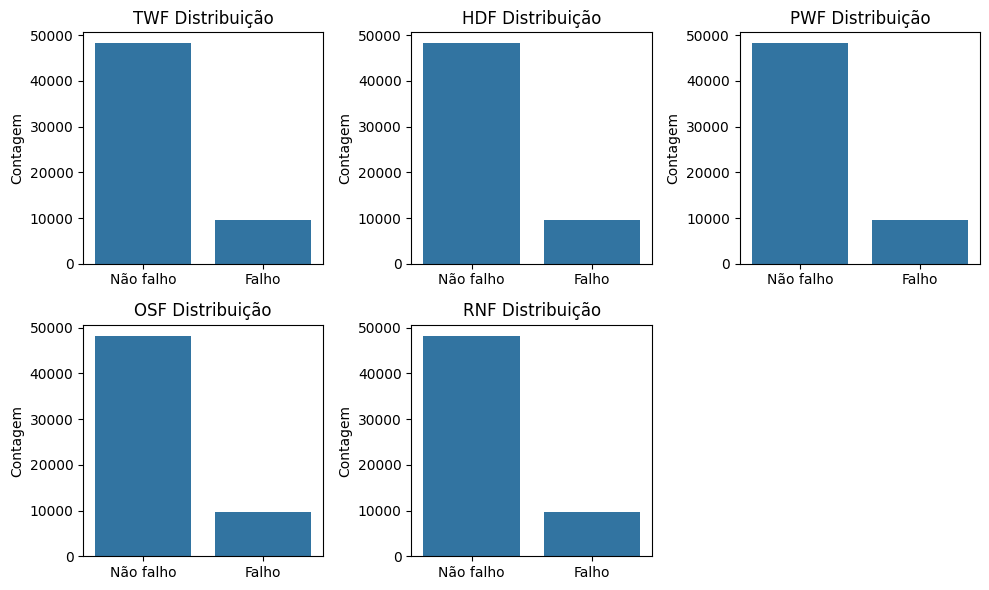

In [26]:
# visualizacao da distribuicao desbalanceada dos dados por cada coluna de falha

failure_columns = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

plt.figure(figsize=(10, 6))


for i, col in enumerate(failure_columns):
    plt.subplot(2, 3, i+1)  
    sns.countplot(x=col, data=dataset)
    plt.title(f'{col} Distribuição')
    plt.xlabel('')
    plt.ylabel('Contagem')
    plt.xticks(ticks=[0, 1], labels=['Não falho', 'Falho'], rotation=0)

plt.tight_layout()
plt.show()

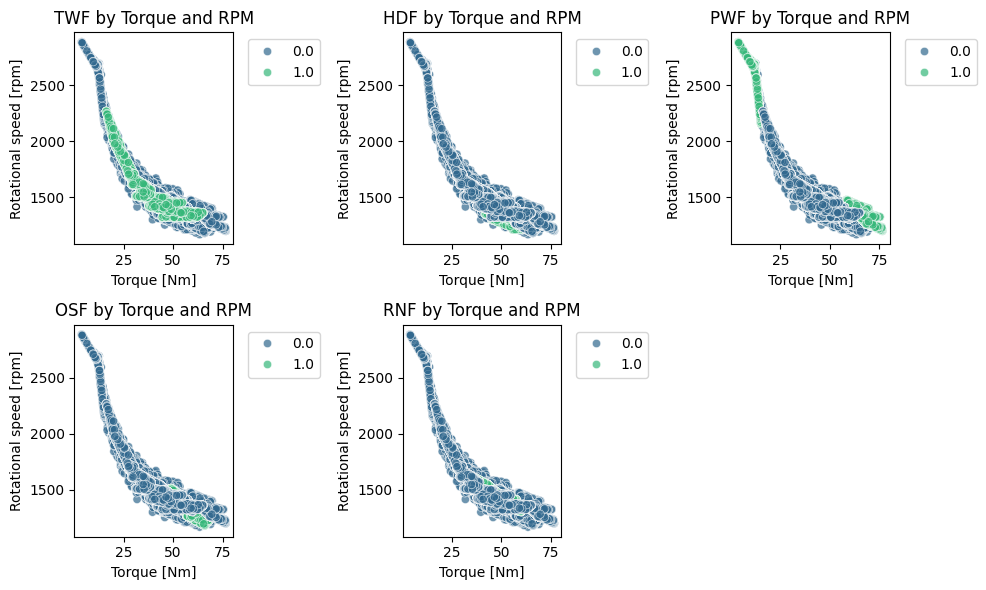

In [27]:
# visualiza onde cada tipo de falha ocorre em funcao do Torque e da Velocidade de Rotacao

failure_columns = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
plt.figure(figsize=(10, 6))


for i, col in enumerate(failure_columns):
    plt.subplot(2, 3, i+1) 
    sns.scatterplot(data=dataset, 
               x='Torque [Nm]', 
               y='Rotational speed [rpm]', 
               hue=col,
               palette='viridis',
               alpha=0.7)
    plt.title(f'{col} by Torque and RPM')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

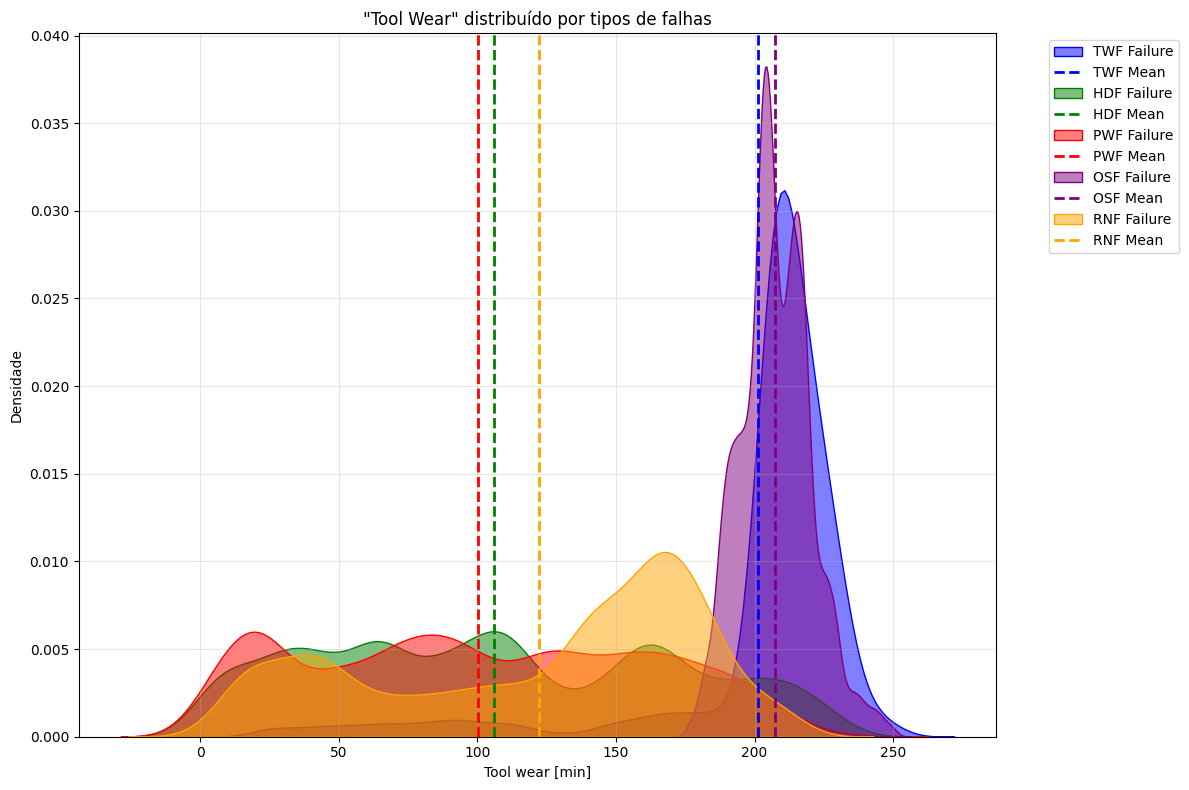

In [28]:
'''
Analise da distribuicao do desgaste da ferramenta (Tool wear [min]) para cada tipo de falha



KDE (Kernel Density Estimation) -> É densidade de probabilidade
Exemplo:
TWF Failure -> distribuição do desgaste da ferramenta somente nos casos em que houve falha por desgaste
TWF Mean -> valor médio de Tool wear [min] quando ocorre uma falha do tipo TWF
'''
plt.figure(figsize=(12, 8))


failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
colors = ['blue', 'green', 'red', 'purple', 'orange']


for failure, color in zip(failure_types, colors):
    failure_tool_wear = dataset[dataset[failure] == 1]['Tool wear [min]']
    sns.kdeplot(failure_tool_wear, 
                label=f'{failure} Failure', 
                fill=True, 
                color=color,
                alpha=0.5)
    
    
    plt.axvline(failure_tool_wear.mean(), 
                color=color, 
                linestyle='--', 
                linewidth=2,
                label=f'{failure} Mean')

plt.xlabel('Tool wear [min]')
plt.ylabel('Densidade')
plt.title('"Tool Wear" distribuído por tipos de falhas')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

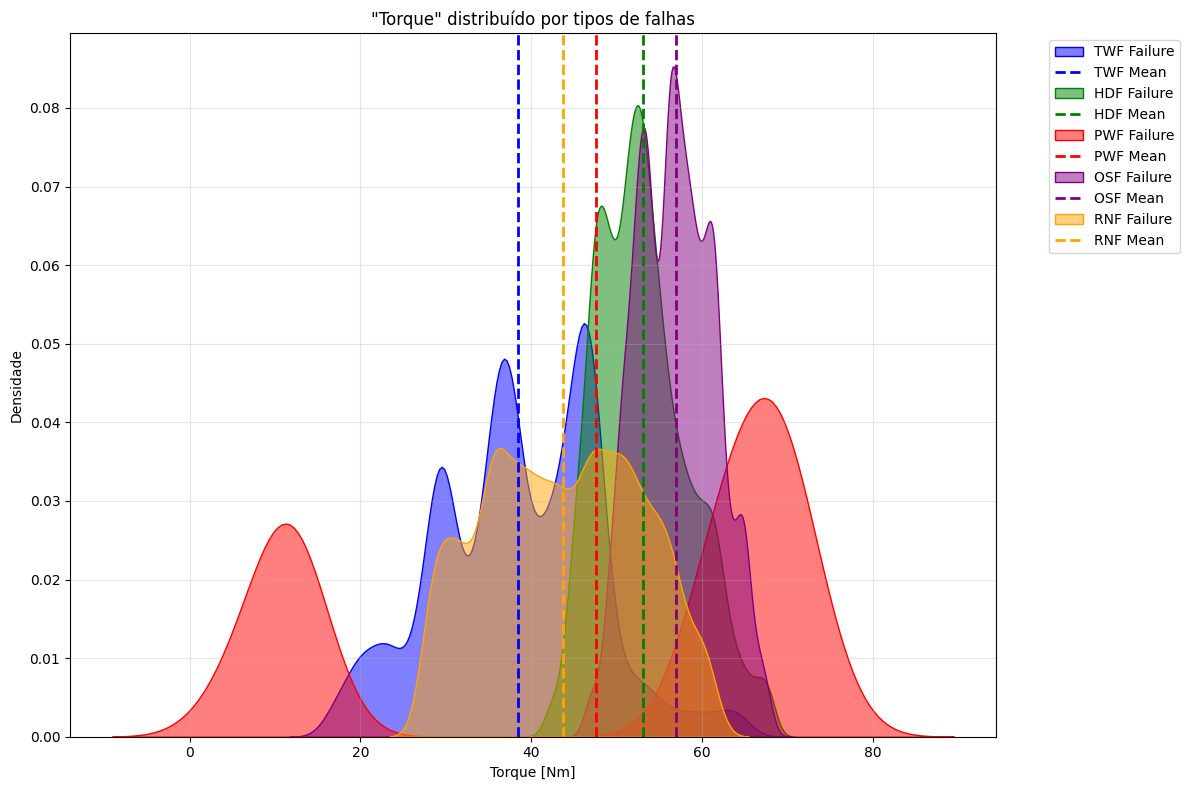

In [29]:
plt.figure(figsize=(12, 8))

failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
colors = ['blue', 'green', 'red', 'purple', 'orange']

for failure, color in zip(failure_types, colors):
    failure_tool_wear = dataset[dataset[failure] == 1]['Torque [Nm]']
    sns.kdeplot(failure_tool_wear, 
                label=f'{failure} Failure', 
                fill=True, 
                color=color,
                alpha=0.5)
    
    
    plt.axvline(failure_tool_wear.mean(), 
                color=color, 
                linestyle='--', 
                linewidth=2,
                label=f'{failure} Mean')

plt.xlabel('Torque [Nm]')
plt.ylabel('Densidade')
plt.title('"Torque" distribuído por tipos de falhas')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

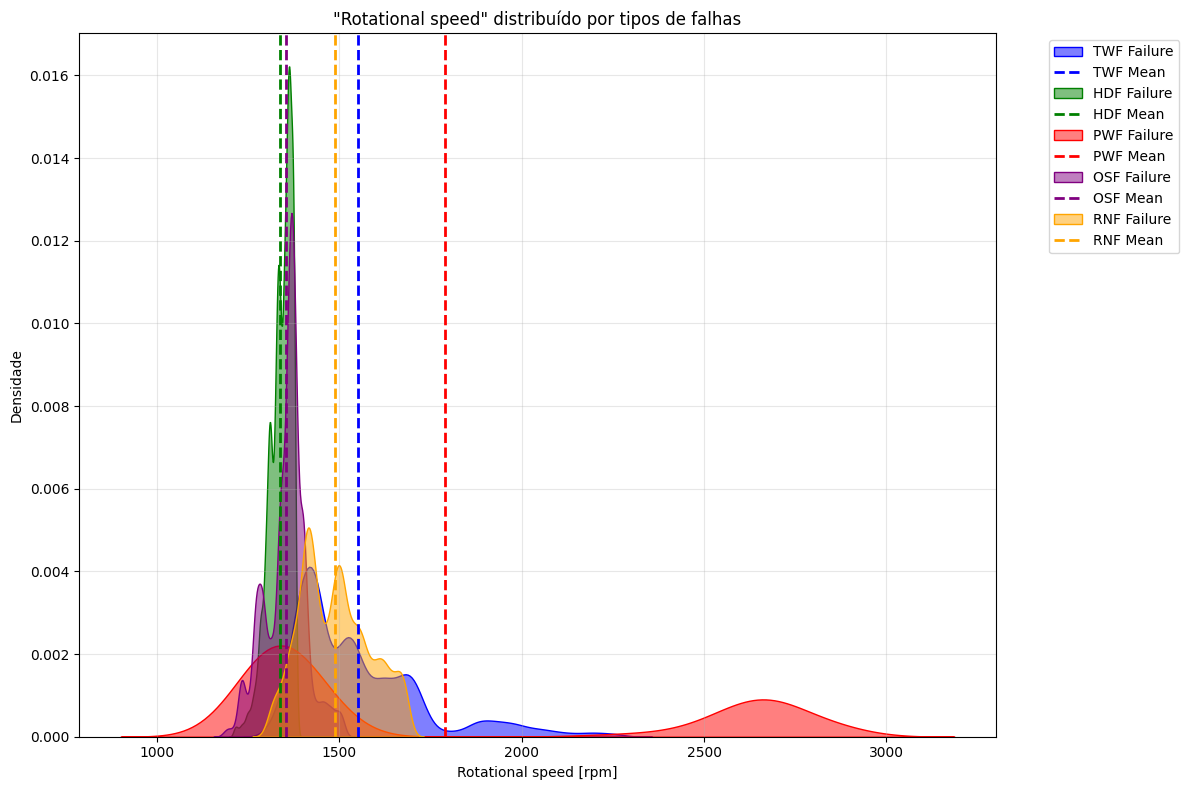

In [30]:
plt.figure(figsize=(12, 8))


failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
colors = ['blue', 'green', 'red', 'purple', 'orange']


for failure, color in zip(failure_types, colors):
    failure_tool_wear = dataset[dataset[failure] == 1]['Rotational speed [rpm]']
    sns.kdeplot(failure_tool_wear, 
                label=f'{failure} Failure', 
                fill=True, 
                color=color,
                alpha=0.5)
    
    
    plt.axvline(failure_tool_wear.mean(), 
                color=color, 
                linestyle='--', 
                linewidth=2,
                label=f'{failure} Mean')

plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Densidade')
plt.title('"Rotational speed" distribuído por tipos de falhas')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

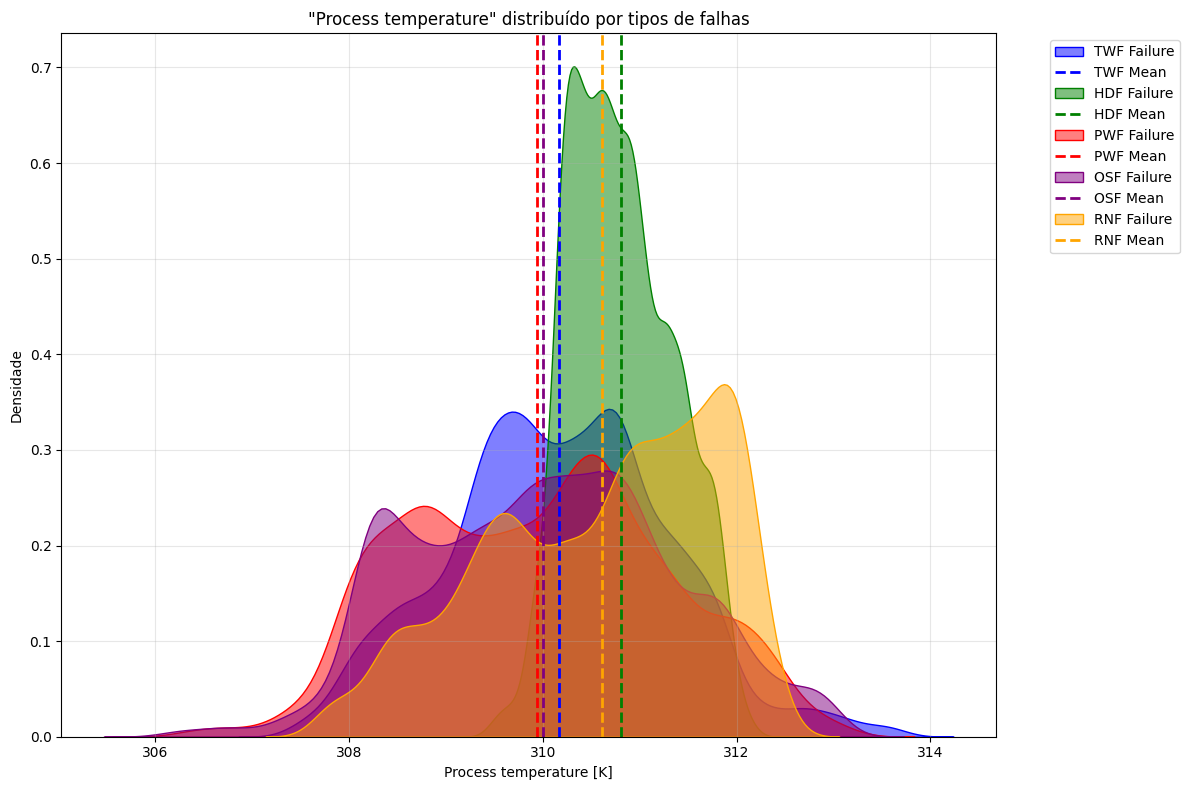

In [31]:
plt.figure(figsize=(12, 8))


failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
colors = ['blue', 'green', 'red', 'purple', 'orange']


for failure, color in zip(failure_types, colors):
    failure_tool_wear = dataset[dataset[failure] == 1]['Process temperature [K]']
    sns.kdeplot(failure_tool_wear, 
                label=f'{failure} Failure', 
                fill=True, 
                color=color,
                alpha=0.5)
    
    
    plt.axvline(failure_tool_wear.mean(), 
                color=color, 
                linestyle='--', 
                linewidth=2,
                label=f'{failure} Mean')

plt.xlabel('Process temperature [K]')
plt.ylabel('Densidade')
plt.title('"Process temperature" distribuído por tipos de falhas')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

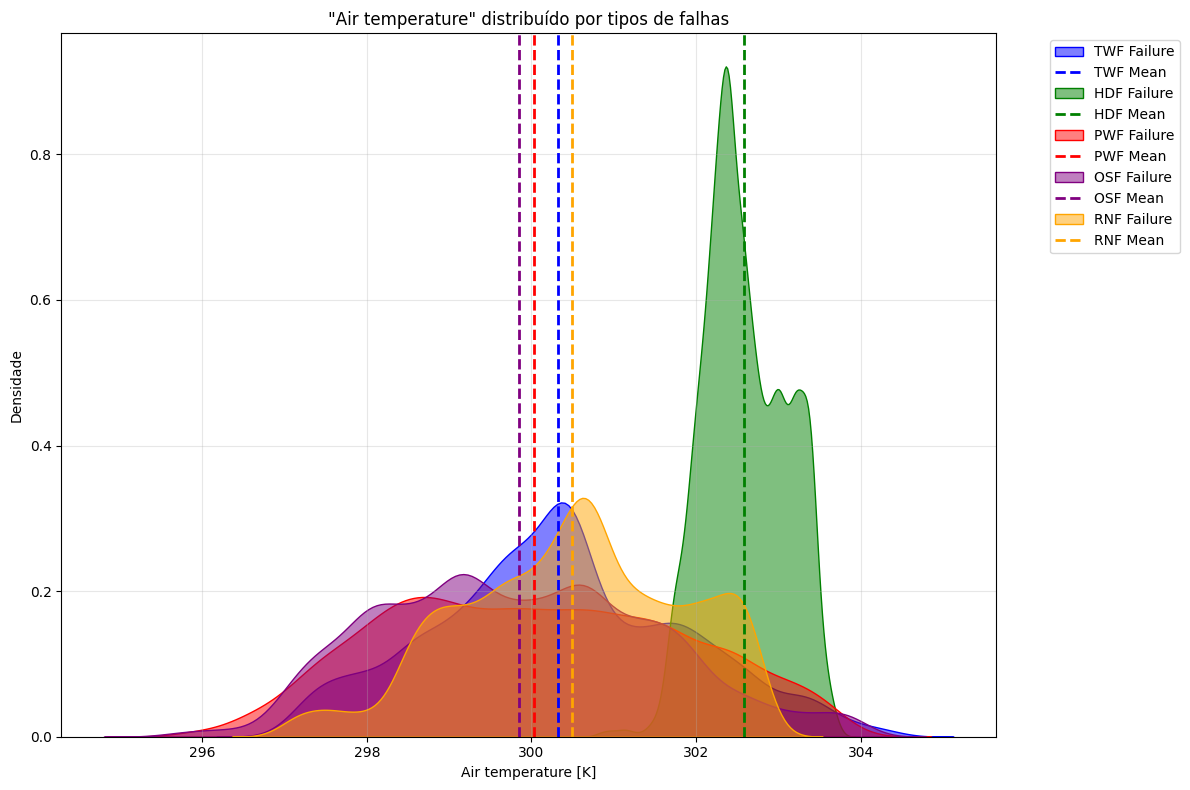

In [32]:
plt.figure(figsize=(12, 8))

failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
colors = ['blue', 'green', 'red', 'purple', 'orange']

for failure, color in zip(failure_types, colors):
    failure_tool_wear = dataset[dataset[failure] == 1]['Air temperature [K]']
    sns.kdeplot(failure_tool_wear, 
                label=f'{failure} Failure', 
                fill=True, 
                color=color,
                alpha=0.5)
    

    plt.axvline(failure_tool_wear.mean(), 
                color=color, 
                linestyle='--', 
                linewidth=2,
                label=f'{failure} Mean')

plt.xlabel('Air temperature [K]')
plt.ylabel('Densidade')
plt.title('"Air temperature" distribuído por tipos de falhas')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

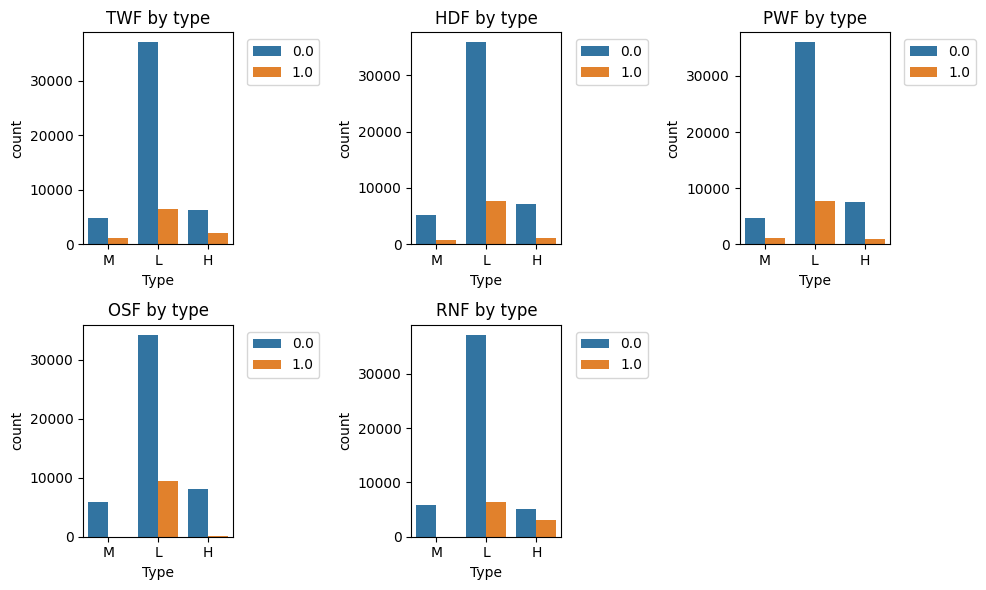

In [33]:
# analise da distribuicao das falhas sobre a coluna 'Type'

failure_columns = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
plt.figure(figsize=(10, 6))


for i, col in enumerate(failure_columns):
    plt.subplot(2, 3, i+1)  
    sns.countplot(data=dataset, x='Type', hue=col)
    plt.title(f'{col} by type')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

#### Detecção de outliers
- São valores que fogem do padrão, mas ainda assim são válidos

O boxplot apresenta:

A distribuição dos valores de Torque

A mediana (linha dentro da caixa)

O intervalo onde está a maior parte dos dados (IQR)

Os limites considerados "normais"

Os outliers, que são pontos fora desse intervalo

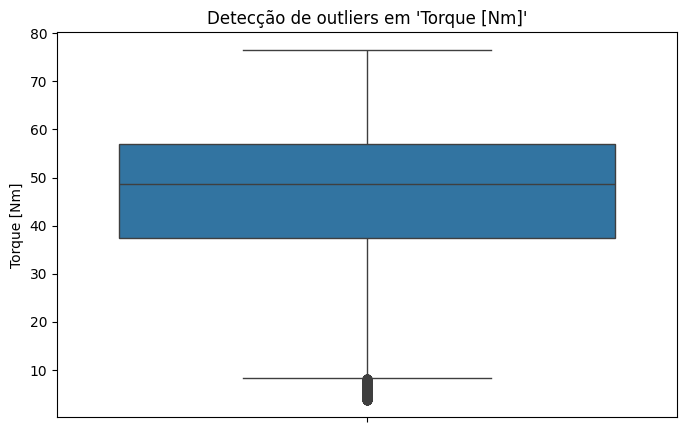

In [ ]:


plt.figure(figsize=(8, 5))
sns.boxplot(data=dataset['Torque [Nm]'])
plt.title("Detecção de outliers em 'Torque [Nm]'")
plt.show()

##### Explicando -> Detecção de outliers em 'Torque [Nm]'

A caixa azul representa onde estão 50% dos dados:

Parte inferior da caixa -> 1º quartil (Q1) -> 38 Nm

Parte superior da caixa -> 3º quartil (Q3) -> 56 Nm

Linha interna -> mediana -> 49 Nm

Conclusão:
A maior parte dos valores de torque está entre 38 e 56 Nm, com mediana por volta de 49 Nm.

Whiskers:

->São os limites onde os valores ainda são considerados normais:

->Bigode superior -> 78 Nm

->Bigode inferior -> 8–10 Nm

->Esses valores marcam o intervalo sem outliers

Pontos abaixo do bigode inferior tem OUTLIERS

->Tem vários pontos entre 5 e 10 Nm
Esses são valores de torque muito baixos, raros no processo

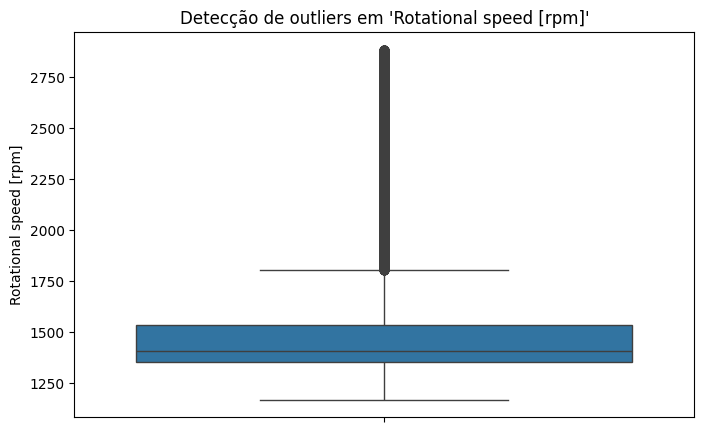

In [34]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=dataset['Rotational speed [rpm]'])
plt.title("Detecção de outliers em 'Rotational speed [rpm]'")
plt.show()

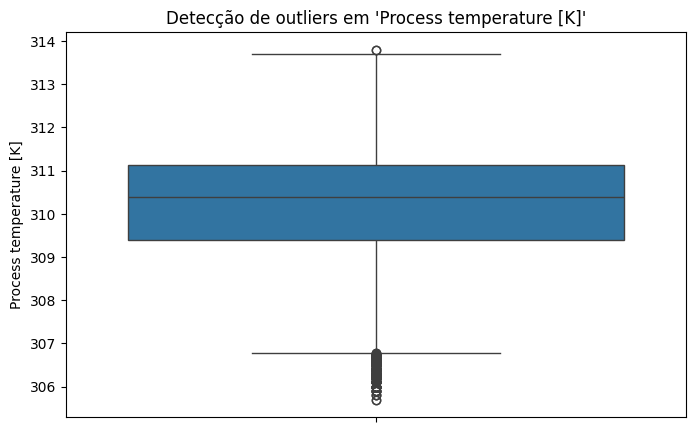

In [35]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=dataset['Process temperature [K]'])
plt.title("Detecção de outliers em 'Process temperature [K]'")
plt.show()

#### Distribuição dos dados em termos de densidade


Ajuda a entender se:

- Os dados estão normalmente distribuído

- Se existe mais de um comportamento operacional

- Se existem valores raros (outliers)

- Se tem picos específicos de operação

<Axes: xlabel='Torque [Nm]', ylabel='Density'>

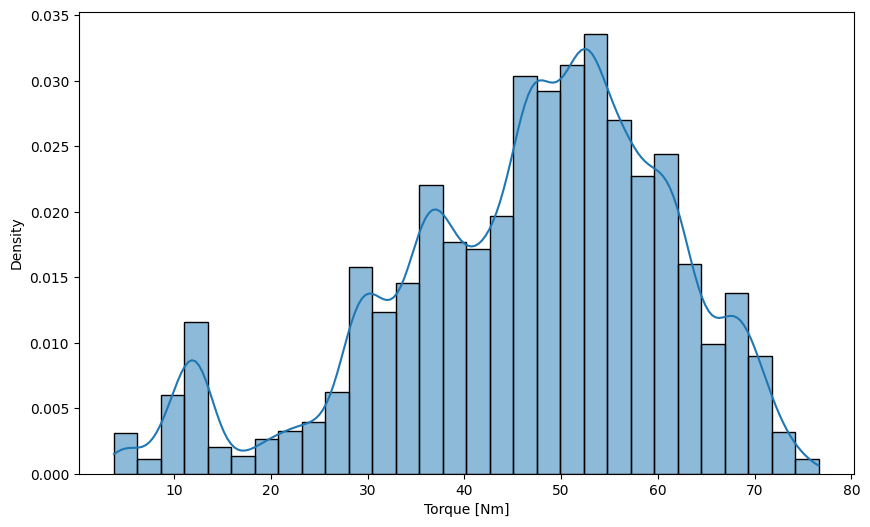

In [38]:
# Verificar a distribuição natural dos valores de 'Torque [Nm]'

plt.figure(figsize=(10, 6))
sns.histplot(dataset['Torque [Nm]'], kde=True, stat="density", bins=30)

<Axes: xlabel='Rotational speed [rpm]', ylabel='Density'>

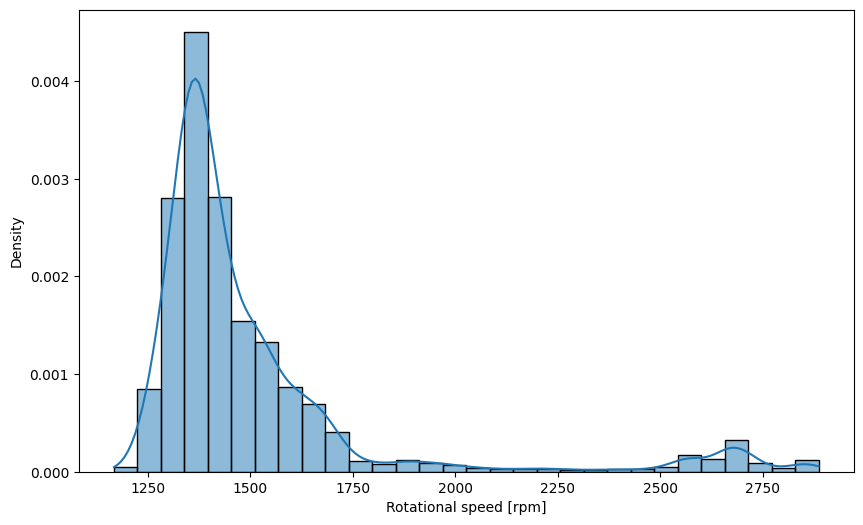

In [39]:
# Verificar a distribuição natural dos valores de 'Rotational speed [rpm]'

plt.figure(figsize=(10, 6))
sns.histplot(dataset['Rotational speed [rpm]'], kde=True, stat="density", bins=30)

<Axes: xlabel='Process temperature [K]', ylabel='Density'>

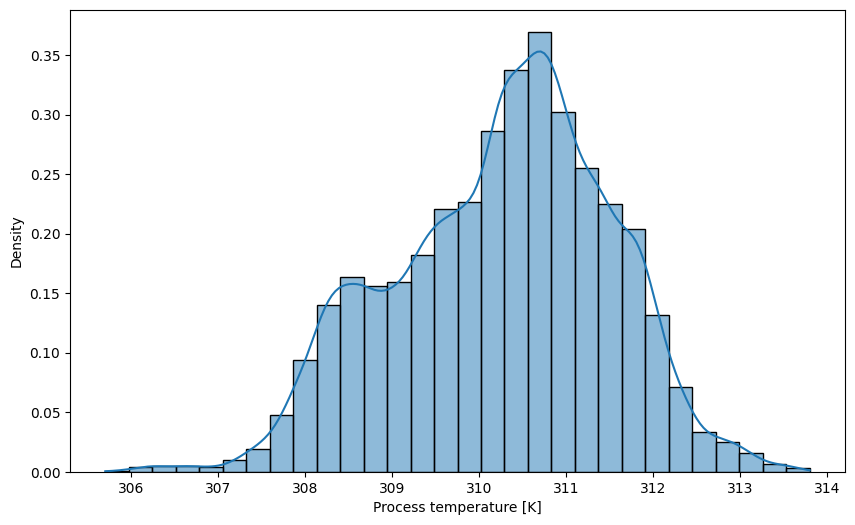

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Process temperature [K]'], kde=True, stat="density", bins=30)

<Axes: xlabel='Tool wear [min]', ylabel='Density'>

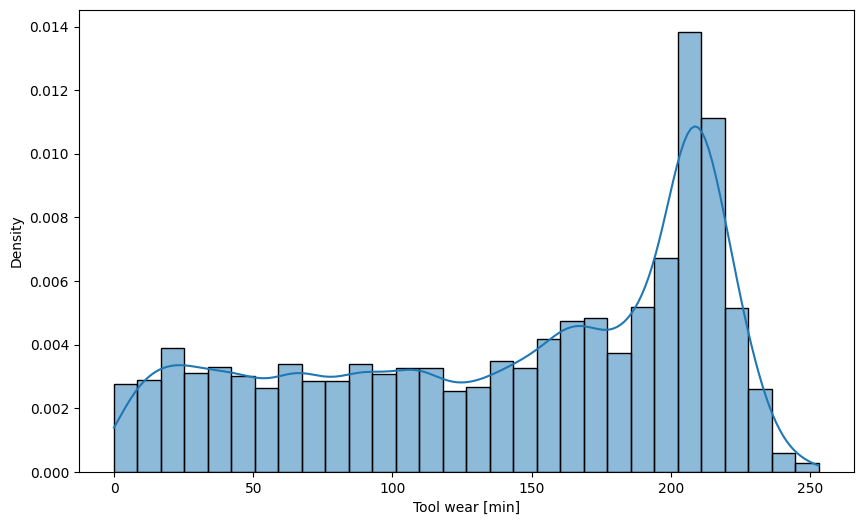

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Tool wear [min]'], kde=True, stat="density", bins=30)

In [42]:
# Faz Label Encoding automático em todas as colunas categóricas (tipo object)

from sklearn.preprocessing import LabelEncoder
import pickle
for col in dataset.select_dtypes(include='object'):
    lb=LabelEncoder()
    dataset[col]=lb.fit_transform(dataset[col])
    filename = f"{col}_label_encoder.pkl"
    with open(filename, 'wb') as f:
        pickle.dump(lb, f)

In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57858 entries, 0 to 57857
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     57858 non-null  int64  
 1   Air temperature [K]      57858 non-null  float64
 2   Process temperature [K]  57858 non-null  float64
 3   Rotational speed [rpm]   57858 non-null  int64  
 4   Torque [Nm]              57858 non-null  float64
 5   Tool wear [min]          57858 non-null  int64  
 6   HDF                      57858 non-null  float64
 7   No failure               57858 non-null  float64
 8   OSF                      57858 non-null  float64
 9   PWF                      57858 non-null  float64
 10  RNF                      57858 non-null  float64
 11  TWF                      57858 non-null  float64
dtypes: float64(9), int64(3)
memory usage: 5.3 MB


#### Heatmap

- mostra a correlação entre todas as variáveis numéricas do dataset

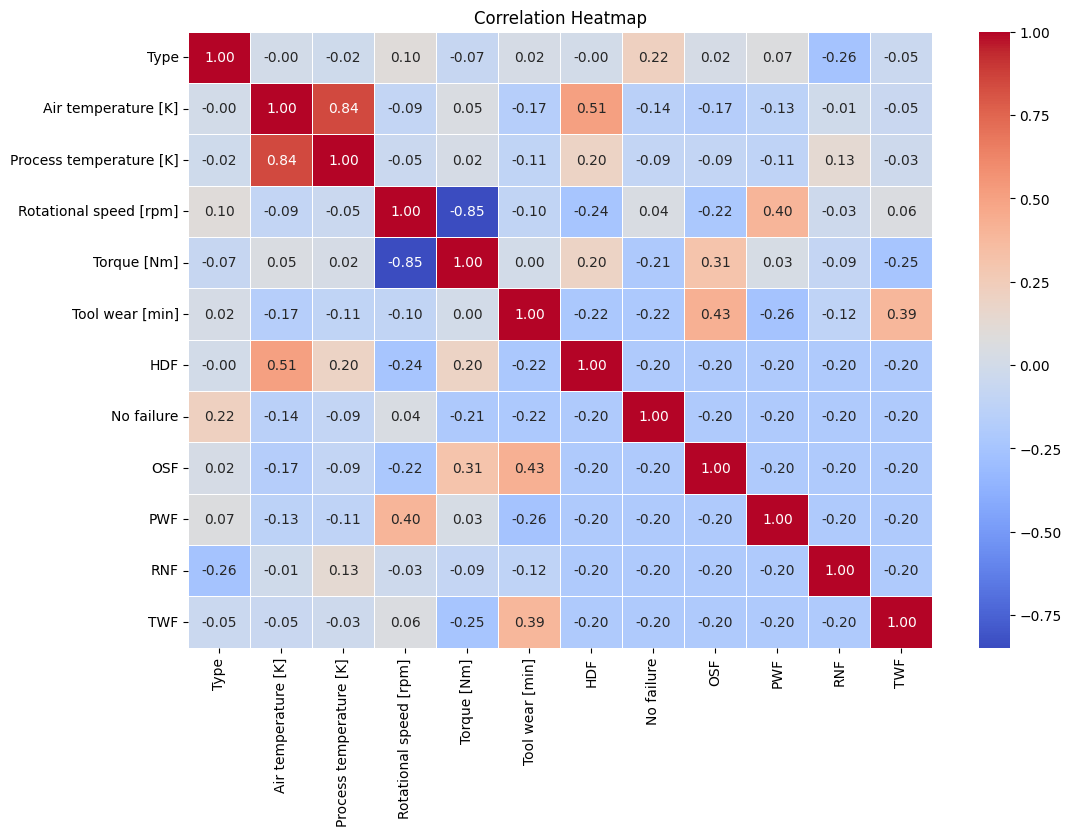

In [44]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show the plot
plt.title("Correlation Heatmap")
plt.show()

In [45]:
features=dataset.drop(columns=['TWF','HDF','PWF','OSF','RNF','No failure'])
y=dataset[['TWF','HDF','PWF','OSF','RNF']]

In [46]:
'''
Aplica MinMax Scaling (normalização entre 0 e 1) em todas as colunas numéricas do dataframe features
'''

from sklearn.preprocessing import MinMaxScaler
import pickle
for col in features.columns:
    my_scaler=MinMaxScaler()
    features[col]=my_scaler.fit_transform(features[[col]])
    filename = f"{col}_MinMaxScaler.pkl"
    with open(filename, 'wb') as f:
        pickle.dump(my_scaler, f)

In [47]:
features.describe()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,57858.000000,57858.000000,57858.000000,57858.000000,57858.000000,57858.000000
mean,0.478966,0.569513,0.562199,0.198946,0.587147,0.556124
std,0.247039,0.196030,0.153825,0.184360,0.202264,0.275694
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.415231,0.456050,0.106519,0.461944,0.320158
50%,0.500000,0.575459,0.579993,0.137951,0.616171,0.632411
75%,0.500000,0.742259,0.671277,0.211874,0.729635,0.810277
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
'''   
Implementa stratified train-test split para problemas multilabel

Garante que todas as combinações de rótulos multilabel apareçam na mesma proporção tanto no treino quanto no teste

y não é uma coluna única, mas sim várias colunas de falhas:

TWF | HDF | PWF | OSF | RNF | No Failure
0     1     0     0     0       0
1     0     0     0     0       0
0     0     1     0     0       0


isso é multilabel, porque cada amostra pode ter mais de um rótulo

train_test_split comum NÃO mantém o equilíbrio das classes nesse caso

com esse código cria uma versão estratificada, fazendo que:

- combinações raras de falhas apareçam no treino e no teste
- nenhum tipo de falha desapareça no conjunto de teste
- a proporção entre labels seja preservada

'''

import numpy as np
from collections import defaultdict

def multilabel_train_test_split(X, y, test_size=0.2, random_state=None):
    """Implementação manual de divisão estratificada multilabel"""
    if random_state:
        np.random.seed(random_state)
    
    
    label_combos = y.astype(str).apply('_'.join, axis=1) 
    '''
    Gera uma string para cada combinação de labels

    ISSO -> TWF=0, HDF=1, OSF=0
    VIRA ISSO -> "0_1_0"
    '''

    combo_counts = label_combos.value_counts() 
    '''
    Conta quantas vezes cada combinação aparece

    | Label Combo | Count |
    | ----------- | ----- |
    | 0_1_0       | 4000  |
    | 0_0_1       | 300   |
    | 1_0_0       | 50    |

    '''
    
    train_idx, test_idx = [], []  # Cria listas de índices para treino e teste
    

    '''  
    Para cada combinação multilabel — divide em treino e teste

    Para cada combinação:

    - embaralha os índices

    - usa 80% para treino

    - usa 20% para teste

    - garante proporcionalidade de cada grupo
    '''
    for combo in combo_counts.index:
        combo_indices = np.where(label_combos == combo)[0]
        np.random.shuffle(combo_indices)
        
        split_point = int(len(combo_indices) * (1 - test_size))
        train_idx.extend(combo_indices[:split_point])
        test_idx.extend(combo_indices[split_point:])
    
    return X.iloc[train_idx], X.iloc[test_idx], y.iloc[train_idx], y.iloc[test_idx] # Retorna X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = multilabel_train_test_split(
    features, y, test_size=0.2, random_state=42
)


'''    
O split final é:

estratificado por combinações multilabel

reprodutível (devido ao random_state)

balanceado corretamente
'''

'    \nO split final é:\n\nestratificado por combinações multilabel\n\nreprodutível (devido ao random_state)\n\nbalanceado corretamente\n'

In [49]:
from sklearn.metrics import precision_score,f1_score,recall_score,accuracy_score,confusion_matrix,classification_report
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
Overall_Accuracy=[]
models={
    "LogisticRegression":MultiOutputClassifier(LogisticRegression(random_state=1,class_weight='balanced')),
    "SVM": MultiOutputClassifier(SVC()),
   "KNeighborsClassifier":MultiOutputClassifier(KNeighborsClassifier()),
   "GaussianNB":MultiOutputClassifier(GaussianNB()),
   "DecisionTreeClassifier":MultiOutputClassifier(DecisionTreeClassifier(random_state=1,criterion = 'entropy',max_depth=28,class_weight='balanced')), #{"gini", "entropy", "log_loss"}),
    "RandomForestClassifier":MultiOutputClassifier(RandomForestClassifier(random_state=1,n_estimators= 20 , criterion = 'entropy',max_depth=50,class_weight='balanced'))
   
}
for model_name, model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    Overall_Accuracy.append(accuracy_score(y_test, y_pred))
performance=pd.DataFrame([Overall_Accuracy],columns=models.keys(),index=['Accuracy']).T

performance  

,Accuracy
LogisticRegression,0.560740
SVM,0.890444
KNeighborsClassifier,0.973648
GaussianNB,0.563677
DecisionTreeClassifier,0.985485
RandomForestClassifier,0.992224


C:\Users\Victor\AppData\Local\Temp\ipykernel_19172\3369861262.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')


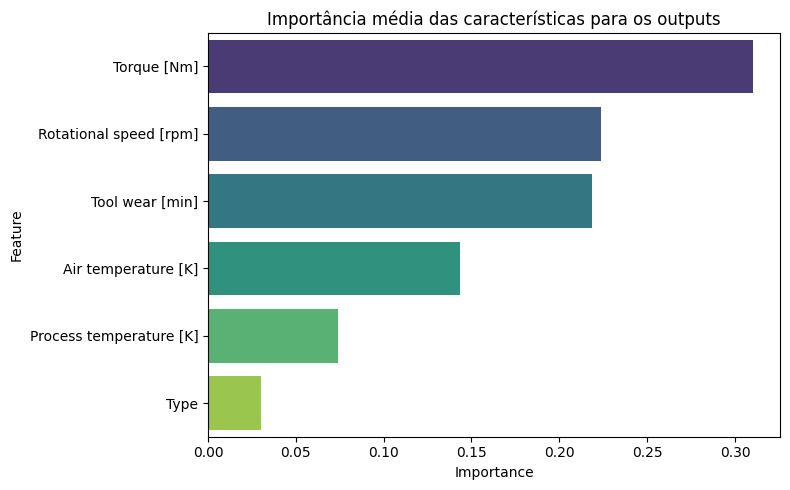

In [50]:
# quais variáveis foram mais importantes para prever as falhas

importances = np.mean([estimator.feature_importances_ for estimator in model.estimators_], axis=0)
feature_names = features.columns


feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title('Importância média das características para os outputs')
plt.tight_layout()
plt.show()


Evaluation for TWF:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9645
         1.0       0.98      1.00      0.99      1929

    accuracy                           1.00     11574
   macro avg       0.99      1.00      0.99     11574
weighted avg       1.00      1.00      1.00     11574

Accuracy: 0.9966


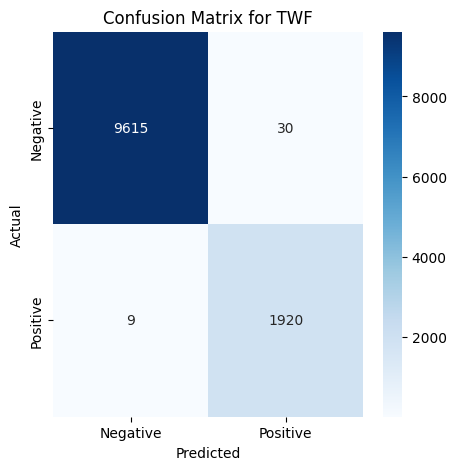


Evaluation for HDF:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9645
         1.0       0.99      1.00      1.00      1929

    accuracy                           1.00     11574
   macro avg       1.00      1.00      1.00     11574
weighted avg       1.00      1.00      1.00     11574

Accuracy: 0.9989


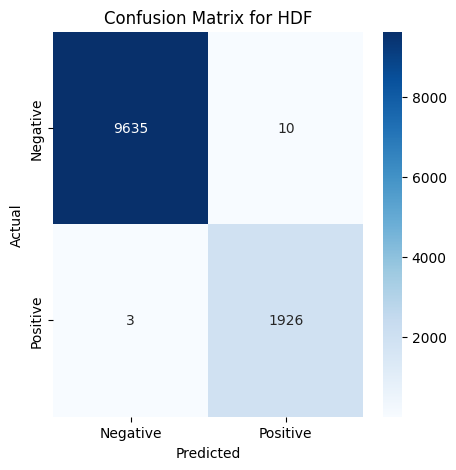


Evaluation for PWF:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9645
         1.0       1.00      1.00      1.00      1929

    accuracy                           1.00     11574
   macro avg       1.00      1.00      1.00     11574
weighted avg       1.00      1.00      1.00     11574

Accuracy: 0.9995


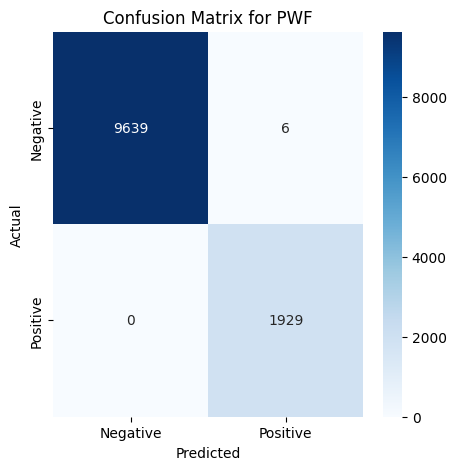


Evaluation for OSF:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9645
         1.0       1.00      1.00      1.00      1929

    accuracy                           1.00     11574
   macro avg       1.00      1.00      1.00     11574
weighted avg       1.00      1.00      1.00     11574

Accuracy: 0.9997


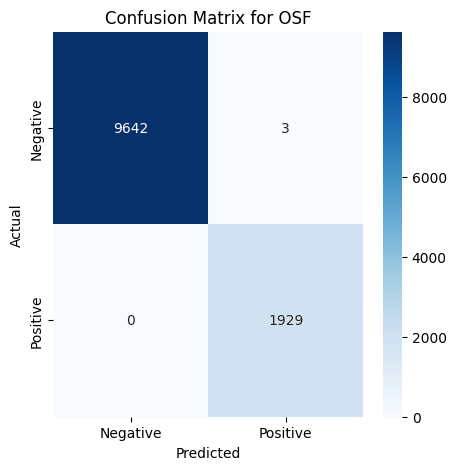


Evaluation for RNF:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9645
         1.0       0.99      1.00      0.99      1929

    accuracy                           1.00     11574
   macro avg       0.99      1.00      1.00     11574
weighted avg       1.00      1.00      1.00     11574

Accuracy: 0.9975


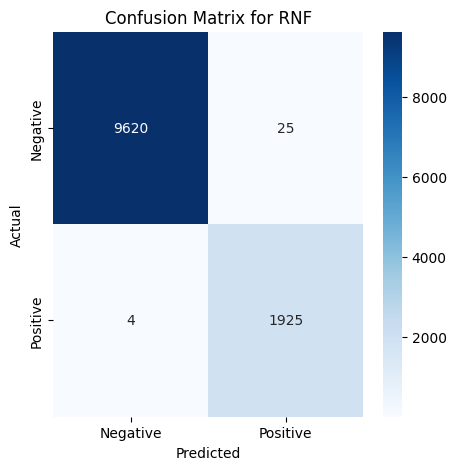

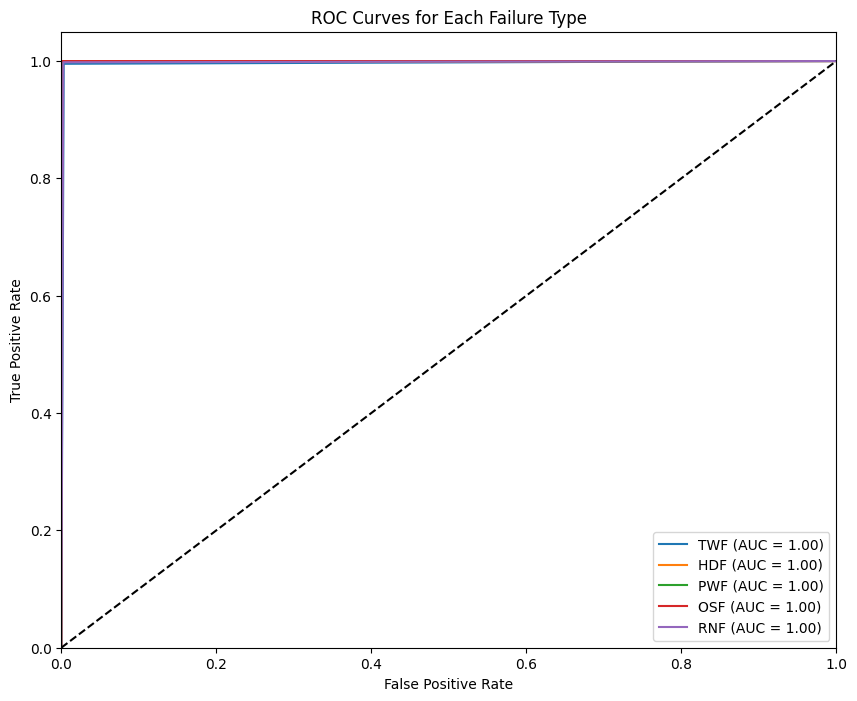


Overall Accuracy:
0.9922


In [ ]:
# Avalização final do modelo RandomForestClassifier

from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
#'Process temperature [K]'
features = ['Air temperature [K]',
            'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
targets = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Classificação e precisão para cada tipo de falha
for i, target in enumerate(targets):
    print(f"\nAvaliação para  {target}:")
    print(classification_report(y_test[target], y_pred[:, i]))
    print(f"Acurácia: {accuracy_score(y_test[target], y_pred[:, i]):.4f}")
    
    # Confusion matrix
    cm = confusion_matrix(y_test[target], y_pred[:, i])
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Negative', 'Positive'], 
                yticklabels=['Negative', 'Positive'])
    plt.title(f'Matriz de confusão para {target}')
    plt.ylabel('Atual')
    plt.xlabel('Predição')
    plt.show()

# Curvas ROC para todos os tipos de falha

'''  
ROC (Receiver Operating Characteristic) -> 
    Ajuda a entender quão bem o modelo separa falha de não-falha
    Compara o seguinte:
        TPR (True Positive Rate)
        FPR (False Positive Rate)

        
AUC (área sob a curva ROC) ->

Interpretação

| AUC         | Qualidade          |
| ----------- | ------------------ |
| 0.90 - 1.00 | Excelente          |
| 0.80 - 0.90 | Muito bom          |
| 0.70 - 0.80 | Aceitável          |
| 0.60 - 0.70 | Fraco              |
| 0.50        | Aleatório          |
| < 0.50      | Pior que aleatório |

'''

plt.figure(figsize=(10, 8))

for i, target in enumerate(targets):
    fpr, tpr, _ = roc_curve(y_test[target], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{target} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Failure Type')
plt.legend(loc="lower right")
plt.show()

# Combinação das avaliações
print("\nOverall Accuracy:")
print(f"{accuracy_score(y_test, y_pred):.4f}")

#### Salvar o modelo

In [52]:
filename = f"RandomForestClassifier.pkl"
with open(filename, 'wb') as f:
        pickle.dump(model, f)